## This notbook should demonstrate how the SMCM can be applied

In [62]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import sys
font = {'family' : 'sans', 'weight' : 'normal',  'size'   : 22} #Make default fonts bigger
matplotlib.rcParams['figure.figsize'] = [15.0,10.0]
matplotlib.rc('font', **font)

### Model configuration and the Config class
It is always necessary to have a configuration file when driving the model. The configuration is straight forward and should be self explanotory. The idea is to add variables with

* key = value

to the model. You can add as many new variables as you like. Let's start reading the model configuration, this is done by the *Config* class.

In [41]:
from configdir import Config

Now create a new Config instance. The config instance is of ```type(dict)``` so you can also always add new keys to the configuration from the code instead of adding it to the config file. But let's create the model configuration from the file *constants.config* first. 

In [42]:
Cfg = Config('constants.config')

As mentioned *Cfg* is of ```type(dict)```:

In [43]:
print(Cfg)

Keys         | Values
----------------------------------------------------------------
form         | v
tau20        | 5.0
start        | 2005-03-21_18:00
tau23        | 1.13
tau10        | 5
plotmask     | False
tebmtembar_l | 6.5
tebmtembar_o | 11.0
Hm           | 5000.0
N2           | 0.0001
J00          | 0.0
q            | 10
phase        | 1.0
interact     | True
beta         | 2.2804e-11
add_c        | 0.45
animate      | None
tend         | 136
mul          | 0.8
type         | multiply
seed         | None
dtmax        | 1.5
n            | 70
tau02        | 2.0
theta0       | 300.0
datadir      | /home/unimelb.edu.au/mbergemann/Data/SMCM
ngrid        | 10
tau30        | 5.0
tau01        | 1.0
g            | 9.81
landmask     | /home/unimelb.edu.au/mbergemann/Data/Cmorph_slm.nc
ZT           | 16000.0
dt           | 0.16666666666666666
nb           | 8
mgrid        | 10
tebmtembar   | 6.5
tau12        | 2.0
obs          | None



Which means that you can always add and/or manipulate varialbes

In [44]:
Cfg['dtmax'] = 1.6 # Reset the themal heating contrast between land and ocean
Cfg['foo'] = 'bar'

In [45]:
print(Cfg.foo, Cfg.dtmax)

bar 1.6


We're only running a test, let's define the constants for dryness and instability, these parameters are the only ones that are not set in the configuration.

In [46]:
C, D = 0.6, 0.2

### Running the model

In [47]:
from coarsgraining import Coarsgraining

Now create the Coarsgraining object.

In [40]:
CG = Coarsgraining(Cfg, C, D) #The model object Cfg.start

**Note:** You can also create the Coarsgraining object without having to create a *Config* ojbect first. You could also only give the filename instead of the Config object:
```python
CG = Coarsgraining('constants.config', C, D) #The model object Cfg.start
```

Now construct the time vector that defines the period of integration. Defining a time vector *is* nessecary because  it will be needed when drving the model with real world data. Even if you don't drive the model with observations you'll have to construct a time vector. But that shoud be straight forward.

In [52]:
tt, t = 0, []
while tt <= int(CG.tend * 60): 
    t.append(float(tt)/60.)
    tt += int(CG.dt * 60)
t = np.array(t)

Now define the output array, where the cloud area fractions for congestus, deep and stratiform clouds are saved

In [53]:
caf = np.zeros([3,len(t)]) 

The actual call of the model involves calling the birth-death process and updating all important fields and variables at a certain timestep.

In [ ]:
for ii,tt in enumerate(t):
    sys.stdout.flush()
    sys.stdout.write('\rRunning model timestep %03i/%03i '%(ii+1,len(t)))
    sys.stdout.flush()
    CG.birthdeath(CG.dt, tt) #Call the birth-death process
    CG._update(tt, m=None, n=None) #And update all parameters
    caf[0,ii] = np.mean(CG.Nccg)/CG.q**2 #CAF of congestus clouds
    caf[1,ii] = np.mean(CG.Ndcg)/CG.q**2 #CAF of deep clouds
    caf[2,ii] = np.mean(CG.Nscg)/CG.q**2 #CAF of stratiform clouds
    

Running model timestep 509/925 

### Plotting the model output

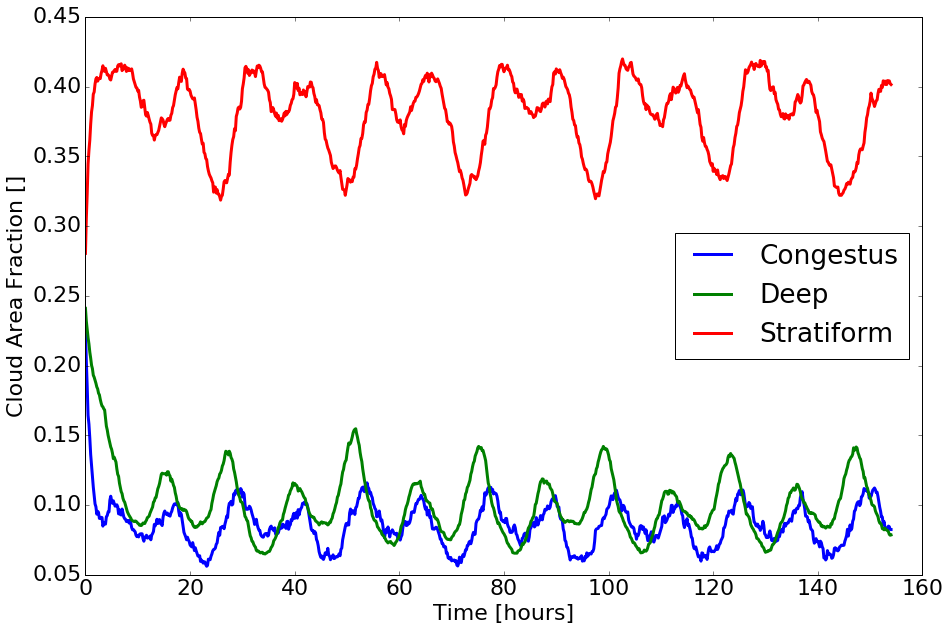

In [64]:
plt.plot(t, caf[0], label='Congestus', lw=3)
plt.plot(t, caf[1], label='Deep', lw=3)
plt.plot(t, caf[2], label='Stratiform',lw=3)
plt.legend(loc=0)
plt.xlabel('Time [hours]')
plt.ylabel('Cloud Area Fraction []')
plt.show()